# **Packages**

In [1]:
import pandas as pd
import numpy as np
import sklearn as sk
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
%matplotlib inline

In [38]:
#import tensorflow packages
import tensorflow 
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from tensorflow.keras.layers import InputLayer
from keras.layers import Activation, Dense

# **Downlaod and Read the data**

In [3]:
#Load the Dataset
!gdown --id 1HNPkgOVrL4I2sL3V3IK3kq6BRRDSj-e4
!gdown --id 1muTNKiL5Ua1snGypHAN12DKC1UXEVtlY
!gdown --id 10oj3jTVfDZyLs91kxbVrAzq34atdtzYh

C:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\site-packages\gdown\cli.py:127: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1HNPkgOVrL4I2sL3V3IK3kq6BRRDSj-e4
To: D:\DEBI\Projects\Project1\train.csv

  0%|          | 0.00/289k [00:00<?, ?B/s]
100%|##########| 289k/289k [00:00<00:00, 1.28MB/s]
100%|##########| 289k/289k [00:00<00:00, 1.28MB/s]
C:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\site-packages\gdown\cli.py:127: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1muTNKiL5Ua1snGypHAN12DKC1UXEVtlY
To: D:\DEBI\Projects\Project1\test.csv

  0%|          | 0.00/62.2k [00:00<?, ?B/s]
100%|##########| 62.2k/62.2k [00:00<00:00, 689kB/s]
C:\Use

In [4]:
data_train=pd.read_csv('train.csv')
data_validate=pd.read_csv('val.csv')
data_test=pd.read_csv('test.csv')

# **Functions**

In [5]:
from sklearn import preprocessing
def label_encoding(dataset,feature_name):
  label_encoder = preprocessing.LabelEncoder()
  dataset[feature_name]= label_encoder.fit_transform(dataset[feature_name])
  dataset[feature_name]=dataset[feature_name]
  classes = label_encoder.classes_
  return classes 

In [6]:
def one_encoding(dataframe, features_to_encode):
    dummies = pd.get_dummies(dataframe[[features_to_encode]],drop_first= True)
    res = dataframe.join(dummies)
    res = res.drop([features_to_encode], axis=1)
    return(res)

In [7]:
def prepare(dataset,feature_name):
  x=dataset.drop(feature_name,axis=1)
  y=dataset[feature_name]
  return x,y

In [8]:
def out_zscore(data):
    global outliers,zscore
    outliers = []
    zscore = []
    threshold = 3
    mean = np.mean(data)
    std = np.std(data)
    for i in data:
        z_score= (i - mean)/std 
        zscore.append(z_score)
        if np.abs(z_score) > threshold:
            outliers.append(i)
    return len(outliers)

In [9]:
from sklearn.manifold import TSNE
def Visulaize_Data(X,Labels ,Title):  
    tfs_embedded = TSNE(n_components=2, perplexity=50, verbose=2 , random_state=1 , n_iter=2000).fit_transform(X)
    sns.set_theme(style="white")
    sns.scatterplot(x=tfs_embedded[:, 0], y=tfs_embedded[:, 1],hue=Labels,palette = 'rocket', legend='full')
    plt.xlabel('component1')
    plt.ylabel('component2')
    plt.title(Title)
    plt.show()

In [10]:
from sklearn.metrics import confusion_matrix , ConfusionMatrixDisplay
def con_matrix(actual, predict, title): 
  cm = confusion_matrix(actual, predict)
  cm_display = ConfusionMatrixDisplay(cm,display_labels= train_classes).plot(cmap=plt.cm.Reds)
  plt.title(title)
  plt.show()
  return cm

In [11]:
def MLP(train_dataset,train_target,val_dataset,val_target,num_epochs,batch_size,verbose,optimizer,num_hidden = 1,num_neurons = 10,active_fun = 'relu' ):
  callback = tensorflow.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=3, min_delta=0.001, mode='max', baseline=None, restore_best_weights=True)
  model = keras.models.Sequential()
  for num  in range(0,num_hidden):
    model.add(Dense(num_neurons, input_shape=(train_dataset.shape[1],),activation=active_fun ))
  model.add(Dense(num_classes, activation='softmax'))
  model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
  model.fit(train_dataset, train_target ,validation_data=(val_dataset, val_target),epochs=num_epochs, batch_size=batch_size,callbacks=[callback], verbose=verbose)
  return model

In [12]:
def MLP_base(train_dataset,train_target,val_dataset,val_target,num_epochs,batch_size,verbose,optimizer,num_hidden = 1,num_neurons = 10,active_fun = 'relu' ):
  model = keras.models.Sequential()
  for num  in range(0,num_hidden):
    model.add(Dense(num_neurons, input_shape=(train_dataset.shape[1],),activation=active_fun ))
  model.add(Dense(num_classes, activation='softmax'))
  model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
  model.fit(train_dataset, train_target ,validation_data=(val_dataset, val_target),
                            epochs=num_epochs, batch_size=batch_size, verbose=verbose)
  return model

In [13]:
def summary(Acc,type_,Loss=None):

    if Loss==None:
        min_max_avg = {
        type_ + " Acc_min" : np.min(Acc) ,
        type_ +" Acc_max" : np.max(Acc) ,
        type_ +" Acc_avg" :np.mean(Acc)
    }
        return min_max_avg
    else :
        min_max_avg = {
              type_ +" Acc_min" : np.min(Acc) ,
              type_ +" Acc_max" : np.max(Acc) ,
              type_ +" Acc_avg" :np.mean(Acc) ,

              type_ +" Losse_min" : np.min(Loss) ,
              type_ +" Losse_max" : np.max(Loss) ,
              type_ +" Losse_avg" :np.mean(Loss) 
          }
        return min_max_avg

In [36]:
def multiple_fit (times,x_train,y_train,x_test, y_test,x_vali, y_vali ,optimizer,batch_size,num_epochs,verbose ,hidden = 1 , neurons = 10,fun='relu' ,PLot_Loss=False):

    Acc_Train = []
    Loss_Train = []
    Acc_Test =[]
    Loss_Test=[]
    Acc_Validation = []
    Loss_Validation = []

    for i in range(times):
        Model = MLP(x_train,y_train,x_vali,y_vali,num_epochs,
            batch_size,verbose,optimizer,num_hidden = hidden ,num_neurons = neurons,active_fun = fun )
        # Train Accuracy
        score_Trian = Model.evaluate(x_train, y_train, verbose=verbose)
        Loss_Train.append(score_Trian[0]) #Loss
        Acc_Train.append(score_Trian[1]) #Acc

        # Test Accuracy
        score_Test = Model.evaluate(x_test, y_test, verbose=0)
        Loss_Test.append(score_Test[0]) #Loss
        Acc_Test.append(score_Test[1]) #Acc

        # Validation Accuracy
        score_Vali = Model.evaluate(x_vali, y_vali, verbose=0)
        Loss_Validation.append(score_Vali[0]) #Loss
        Acc_Validation.append(score_Vali[1]) #Acc

    return {
    "Acc_Train" : Acc_Train ,
    "Loss_Train" : Loss_Train ,

    "Acc_Test" :Acc_Test ,
    "Loss_Test" : Loss_Test ,

    "Acc_Validation" :Acc_Validation ,
    "Loss_Validation" : Loss_Validation 
    }

In [15]:
def optimizersg(opt_name,learning_rate_num, mo_num = 0.1 ):
  if opt_name == 'SGD':
    optimizer = tensorflow.keras.optimizers.SGD(learning_rate= learning_rate_num,momentum= mo_num)
    return optimizer

  elif opt_name == 'AdamW':
    optimizer = AdamW(learning_rate=Adamw_learning_rate , weight_decay=.00001)
    return optimizer

  elif opt_name == 'RMSprop':
    optimizer = tensorflow.keras.optimizers.RMSprop(learning_rate= learning_rate_num)
    return optimizer

# **EDA**

In [16]:
#show data
data_train.head()

,Switch ID,Port Number,Received Packets,Received Bytes,Sent Bytes,Sent Packets,Port alive Duration (S),Delta Received Packets,Delta Received Bytes,Delta Sent Bytes,...,Connection Point,Total Load/Rate,Total Load/Latest,Unknown Load/Rate,Unknown Load/Latest,Latest bytes counter,Active Flow Entries,Packets Looked Up,Packets Matched,Label
0,of:0000000000000004,Port#:1,240,16586,12622603,467,126,0,0,280,...,1,0,0,0,0,0,4,819,757,TCP-SYN
1,of:0000000000000004,Port#:2,158,20530,35464,376,171,4,556,3407,...,2,0,0,0,0,0,5,1018,918,TCP-SYN
2,of:0000000000000008,Port#:3,1930,37881404,67857371,414333,1297,0,0,556,...,2,0,0,0,0,0,8,987400,987276,Normal
3,of:0000000000000001,Port#:4,903,18946410,17900326,98088,176,3,320,270280,...,3,0,0,0,0,0,8,195879,195780,PortScan
4,of:000000000000000b,Port#:1,423,29020,19138042,1562,1451,0,0,560,...,1,0,0,0,0,0,4,4524,4411,Overflow


### Null values

In [17]:
#check null values
data_train.isnull().sum()

Switch ID                        0
Port Number                      0
Received Packets                 0
Received Bytes                   0
Sent Bytes                       0
Sent Packets                     0
Port alive Duration (S)          0
Delta Received Packets           0
Delta Received Bytes             0
Delta Sent Bytes                 0
Delta Sent Packets               0
Delta Port alive Duration (S)    0
Connection Point                 0
Total Load/Rate                  0
Total Load/Latest                0
Unknown Load/Rate                0
Unknown Load/Latest              0
Latest bytes counter             0
Active Flow Entries              0
Packets Looked Up                0
Packets Matched                  0
Label                            0
dtype: int64

There are no null values in this data

### Statistical analysis & Outliers

Statistical analysis

In [18]:
data_train.describe()

,Received Packets,Received Bytes,Sent Bytes,Sent Packets,Port alive Duration (S),Delta Received Packets,Delta Received Bytes,Delta Sent Bytes,Delta Sent Packets,Delta Port alive Duration (S),Connection Point,Total Load/Rate,Total Load/Latest,Unknown Load/Rate,Unknown Load/Latest,Latest bytes counter,Active Flow Entries,Packets Looked Up,Packets Matched
count,2619.000000,2.619000e+03,2.619000e+03,2619.000000,2619.000000,2619.000000,2.619000e+03,2.619000e+03,2619.000000,2619.000000,2619.000000,2.619000e+03,2.619000e+03,2.619000e+03,2.619000e+03,2.619000e+03,2619.000000,2.619000e+03,2.619000e+03
mean,19929.095074,2.606639e+07,2.372645e+07,33676.567774,890.539137,174.948835,3.254661e+05,2.957171e+05,160.607866,4.831615,2.450935,2.044276e+04,5.033087e+05,2.044276e+04,5.033087e+05,2.044276e+04,94.972890,9.920463e+04,9.908445e+04
std,61817.860816,3.670801e+07,3.309908e+07,90565.150583,970.916789,1028.907797,1.166624e+06,1.107859e+06,972.484039,0.374279,1.159286,1.141013e+05,1.796231e+06,1.141013e+05,1.796231e+06,1.141013e+05,828.181086,2.363175e+05,2.363162e+05
min,10.000000,8.560000e+02,6.025000e+03,44.000000,26.000000,0.000000,0.000000e+00,2.780000e+02,2.000000,4.000000,1.000000,-6.446240e+05,0.000000e+00,-6.446240e+05,0.000000e+00,-6.446240e+05,4.000000,1.050000e+02,5.000000e+01
25%,321.500000,8.464900e+04,5.360900e+04,333.500000,136.000000,2.000000,2.780000e+02,2.800000e+02,2.000000,5.000000,1.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,5.000000,2.263000e+03,2.147000e+03
50%,1108.000000,1.262083e+07,1.262176e+07,1243.000000,254.000000,4.000000,5.560000e+02,5.560000e+02,4.000000,5.000000,2.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.000000,6.968000e+03,6.843000e+03
75%,3268.500000,3.736785e+07,3.170219e+07,3727.000000,1721.000000,6.000000,8.310000e+02,7.590000e+02,5.000000,5.000000,3.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,8.000000,2.163300e+04,2.140800e+04
max,352584.000000,2.589422e+08,2.130728e+08,420806.000000,3317.000000,15588.000000,6.171714e+06,6.302910e+06,15593.000000,5.000000,5.000000,1.260657e+06,1.275386e+07,1.260657e+06,1.275386e+07,1.260657e+06,9985.000000,1.012220e+06,1.012085e+06


***For example***

'Received Packets' Field -> have that

Q3 = 3268.500000

Max = 352584.000000

that means there are outliers 

let's plot it 

and the same on all numical fields

<AxesSubplot:xlabel='Received Packets', ylabel='Count'>

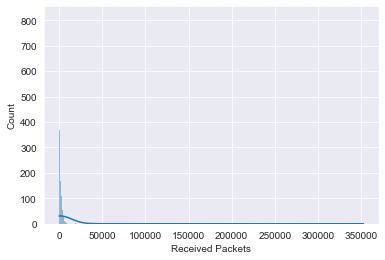

In [19]:
#distribution of 'Received Packets' Field
sns.histplot(data_train['Received Packets'],kde=True) 

C:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Received Packets'>

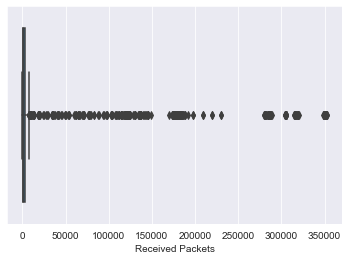

In [20]:
#boxplot of 'Received Packets' Field
sns.boxplot(data_train['Received Packets'])

Another way is zscore 

In [21]:
from scipy import stats
df=data_train.drop(['Switch ID','Port Number','Label'],axis=1)
np.abs(stats.zscore(df))

,Received Packets,Received Bytes,Sent Bytes,Sent Packets,Port alive Duration (S),Delta Received Packets,Delta Received Bytes,Delta Sent Bytes,Delta Sent Packets,Delta Port alive Duration (S),Connection Point,Total Load/Rate,Total Load/Latest,Unknown Load/Rate,Unknown Load/Latest,Latest bytes counter,Active Flow Entries,Packets Looked Up,Packets Matched
0,0.318563,0.709785,0.335537,0.366763,0.787591,0.170066,0.279034,0.266725,0.163127,0.449977,1.251816,0.179197,0.280256,0.179197,0.280256,0.179197,0.109868,0.416408,0.416164
1,0.319889,0.709677,0.715896,0.367768,0.741234,0.166178,0.278558,0.263902,0.120959,0.449977,0.389051,0.179197,0.280256,0.179197,0.280256,0.179197,0.108660,0.415565,0.415482
2,0.291219,0.321926,1.333552,4.203925,0.418716,0.170066,0.279034,0.266476,0.161070,0.449977,0.389051,0.179197,0.280256,0.179197,0.280256,0.179197,0.105037,3.759201,3.759206
3,0.307835,0.194000,0.176054,0.711352,0.736083,0.167150,0.278760,0.022965,4.979328,2.222336,0.473713,0.179197,0.280256,0.179197,0.280256,0.179197,0.105037,0.409165,0.409257
4,0.315602,0.709446,0.138653,0.354670,0.577359,0.170066,0.279034,0.266472,0.161070,0.449977,1.251816,0.179197,0.280256,0.179197,0.280256,0.179197,0.109868,0.400727,0.400698
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2614,0.311994,0.194503,0.716178,0.369126,0.761837,0.168122,0.278796,0.266727,0.163127,0.449977,1.336478,0.179197,0.280256,0.179197,0.280256,0.179197,0.107452,0.413259,0.413150
2615,0.271496,0.015737,0.243498,0.336524,1.478742,0.166178,0.278558,0.266476,0.161070,0.449977,0.473713,0.179197,0.280256,0.179197,0.280256,0.179197,0.109868,0.357344,0.357375
2616,0.316200,0.537908,0.716567,0.370849,0.813345,0.143820,0.172470,0.266476,0.161070,2.222336,0.389051,0.179197,0.280256,0.179197,0.280256,0.179197,0.105037,0.408497,0.408406
2617,0.309389,0.365867,0.046601,0.358248,0.540355,0.124378,0.276137,3.289801,0.057192,0.449977,0.389051,5.346377,3.229734,5.346377,3.229734,5.346377,0.107452,0.406804,0.406772


*Boxplot for all features*

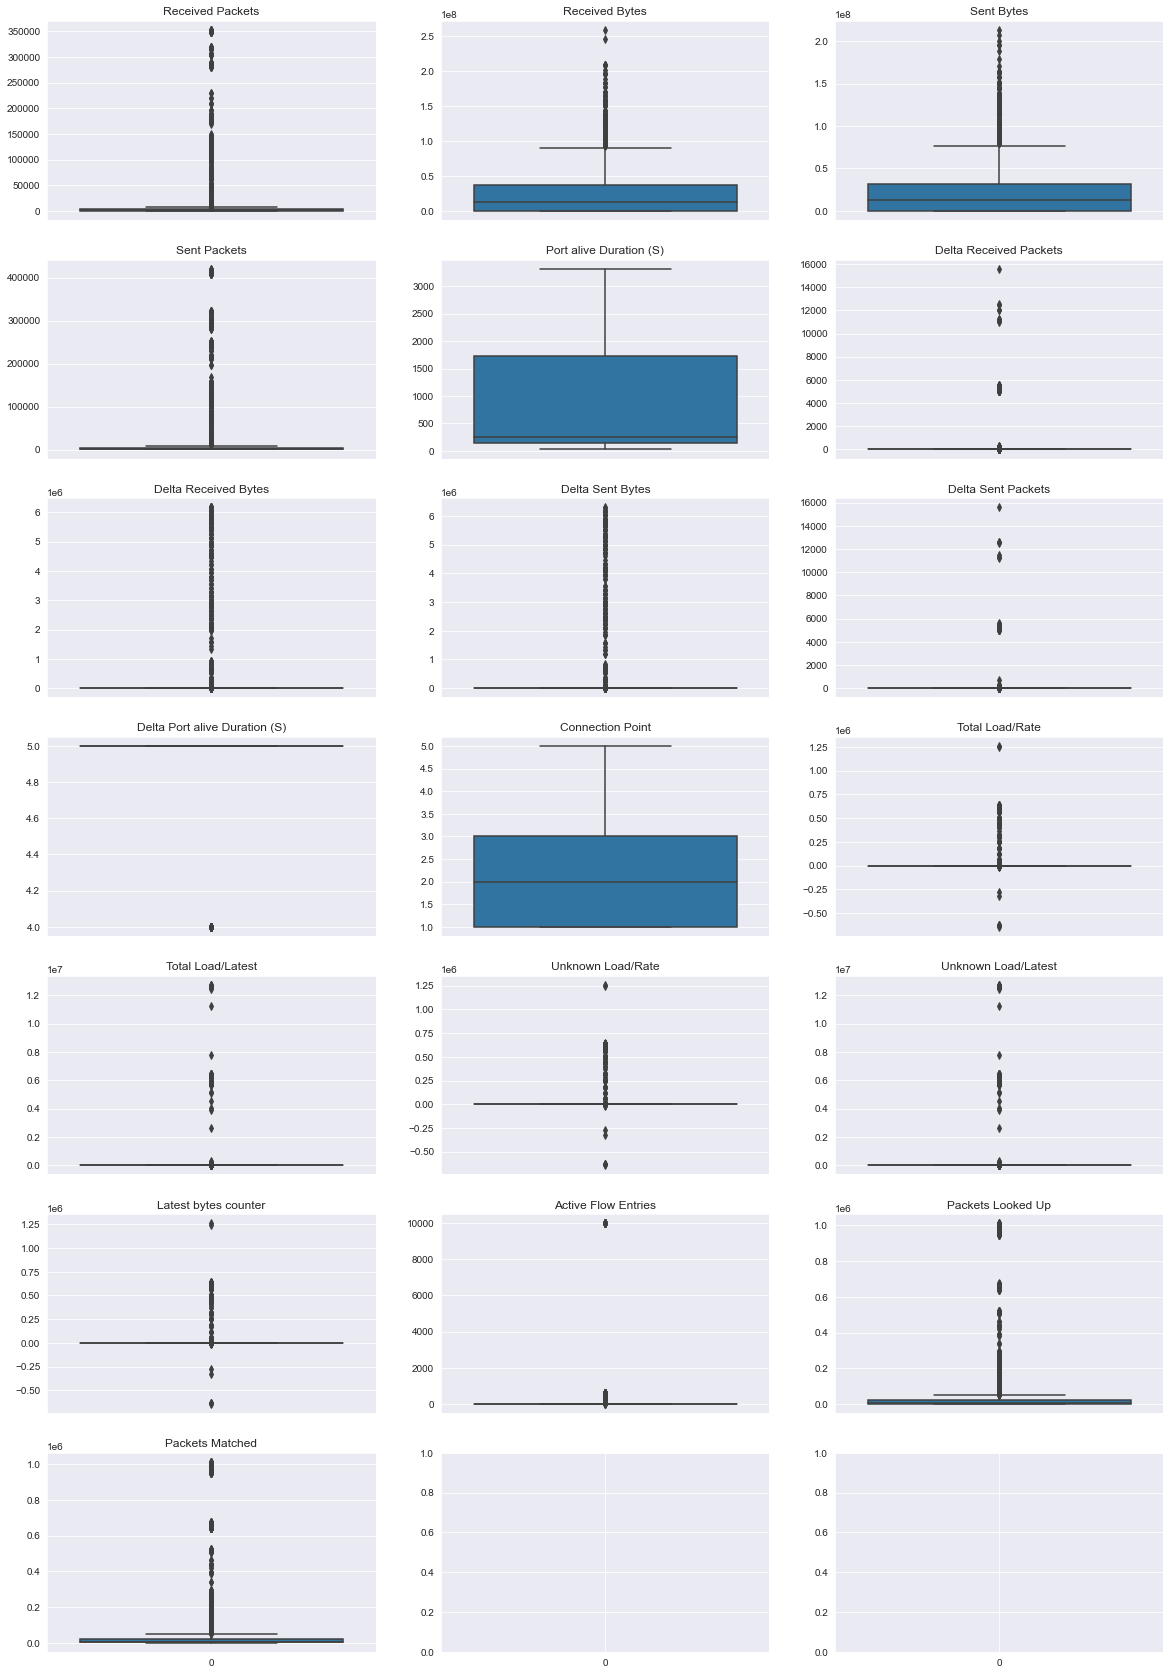

In [22]:
fig, axes = plt.subplots(7, 3, sharex=True, figsize=(20,30))
col_names = list(df.columns)
inc = 0
for i in range(7):
  for j in range(3):
    sns.boxplot(ax=axes[i, j], data=df.iloc[:,[inc]].to_numpy()).set_title(col_names[inc])
    inc = inc + 1
    if inc > 18:
      break

*Number of outliers in each feature*

In [23]:
for i in range(len(col_names)):
  f= out_zscore(df.iloc[:,i])
  print('Numbers of outliers in {} is : {}'.format(df.columns[i],f))

Numbers of outliers in Received Packets is : 80
Numbers of outliers in Received Bytes is : 58
Numbers of outliers in Sent Bytes is : 55
Numbers of outliers in Sent Packets is : 103
Numbers of outliers in Port alive Duration (S) is : 0
Numbers of outliers in Delta Received Packets is : 64
Numbers of outliers in Delta Received Bytes is : 108
Numbers of outliers in Delta Sent Bytes is : 105
Numbers of outliers in Delta Sent Packets is : 59
Numbers of outliers in Delta Port alive Duration (S) is : 0
Numbers of outliers in Connection Point is : 0
Numbers of outliers in Total Load/Rate is : 90
Numbers of outliers in Total Load/Latest is : 185
Numbers of outliers in Unknown Load/Rate is : 90
Numbers of outliers in Unknown Load/Latest is : 185
Numbers of outliers in Latest bytes counter is : 90
Numbers of outliers in Active Flow Entries is : 18
Numbers of outliers in Packets Looked Up is : 106
Numbers of outliers in Packets Matched is : 106


### Instances per class

PortScan     666
TCP-SYN      651
Blackhole    561
Diversion    414
Normal       254
Overflow      73
Name: Label, dtype: int64


C:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


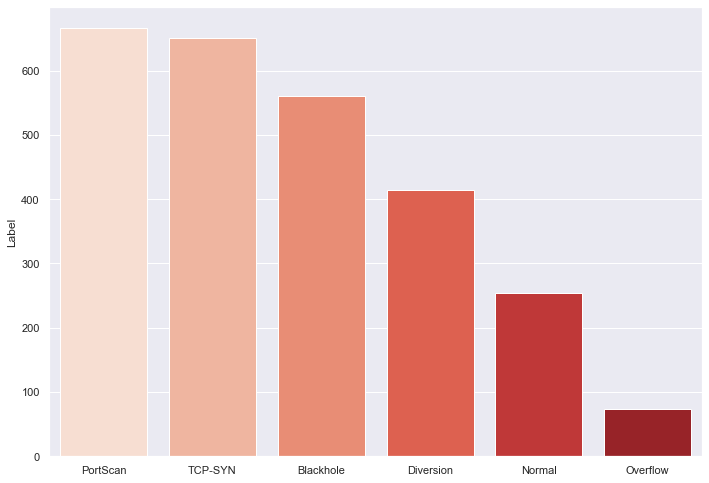

In [24]:
x=data_train.Label.value_counts()
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.barplot(x.index,x,palette="Reds")

class_distribution = data_train['Label'].value_counts()
print(class_distribution)

# **Preprocessing**

In [25]:
#one hot encoding
data_train = one_encoding(data_train,'Switch ID')
data_test = one_encoding(data_test,'Switch ID')
data_validate = one_encoding(data_validate,'Switch ID')

data_train = one_encoding(data_train,'Port Number')
data_test = one_encoding(data_test,'Port Number')
data_validate = one_encoding(data_validate,'Port Number')


# Encode labels in column 'Label' in all datasets
train_classes = label_encoding(data_train,'Label')
test_classes = label_encoding(data_test,'Label')
validation_classes = label_encoding(data_validate,'Label')

In [26]:
data_train.columns

Index(['Received Packets', 'Received Bytes', 'Sent Bytes', 'Sent Packets',
       'Port alive Duration (S)', 'Delta Received Packets',
       'Delta Received Bytes', 'Delta Sent Bytes', 'Delta Sent Packets',
       'Delta Port alive Duration (S)', 'Connection Point', 'Total Load/Rate',
       'Total Load/Latest', 'Unknown Load/Rate', 'Unknown Load/Latest',
       'Latest bytes counter', 'Active Flow Entries', 'Packets Looked Up',
       'Packets Matched', 'Label', 'Switch ID_of:0000000000000002',
       'Switch ID_of:0000000000000003', 'Switch ID_of:0000000000000004',
       'Switch ID_of:0000000000000005', 'Switch ID_of:0000000000000006',
       'Switch ID_of:0000000000000007', 'Switch ID_of:0000000000000008',
       'Switch ID_of:0000000000000009', 'Switch ID_of:000000000000000a',
       'Switch ID_of:000000000000000b', 'Switch ID_of:000000000000000c',
       'Port Number_Port#:2', 'Port Number_Port#:3', 'Port Number_Port#:4'],
      dtype='object')

In [27]:
#prepare data
x_train,y_train = prepare(data_train,'Label')
x_validate,y_validate = prepare(data_validate,'Label')
x_test,y_test = prepare(data_test,'Label')

In [28]:
# explore the dataset
print('Training set shape: {}'.format(x_train.shape))
print('Training labels shape: {}'.format(y_train.shape))
print('Test set shape: {}'.format(x_test.shape))
print('Test labels shape: {}'.format(y_test.shape))
print('Validation set shape: {}'.format(x_validate.shape))
print('Validation labels shape: {}'.format(y_validate.shape))

Training set shape: (2619, 33)
Training labels shape: (2619,)
Test set shape: (561, 33)
Test labels shape: (561,)
Validation set shape: (561, 33)
Validation labels shape: (561,)


In [29]:
labels = set(y_train)
print('The classes are: {}'.format(labels))

The classes are: {0, 1, 2, 3, 4, 5}


In [30]:
print('Sample labels are: {}'.format(y_train[:19]))

Sample labels are: 0     5
1     5
2     2
3     4
4     3
5     2
6     5
7     1
8     5
9     4
10    4
11    0
12    2
13    2
14    4
15    1
16    1
17    1
18    1
Name: Label, dtype: int32


In [31]:
y_train.shape

(2619,)

In [32]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
#Train
x_train=sc.fit_transform(x_train)
#Val
x_validate=sc.transform(x_validate)
#test
x_test=sc.transform(x_test)

# **Q1**

## *MLP classifier*

In [33]:
!pip install tensorflow-addons
!pip install livelossplot

You should consider upgrading via the 'C:\Users\LENOVO\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'C:\Users\LENOVO\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [34]:
#set AdamW as optimizer
Adamw_learning_rate = 0.001
from tensorflow_addons.optimizers import AdamW
optimizer_Adamw =AdamW(learning_rate=Adamw_learning_rate , weight_decay=.00001)

In [35]:
#set neural network parameters
num_classes=6
features= x_train.shape[1]
num_epochs = 500
batch_size = 1
verbose = 0

In [40]:
from tensorflow import keras
# Create the model
model = keras.models.Sequential()
#hidden layer
model.add(Dense(10, input_shape=(features,),activation='relu'))
#Output layer
model.add(Dense(num_classes, activation='softmax'))
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                340       
                                                                 
 dense_1 (Dense)             (None, 6)                 66        
                                                                 
Total params: 406
Trainable params: 406
Non-trainable params: 0
_________________________________________________________________
None


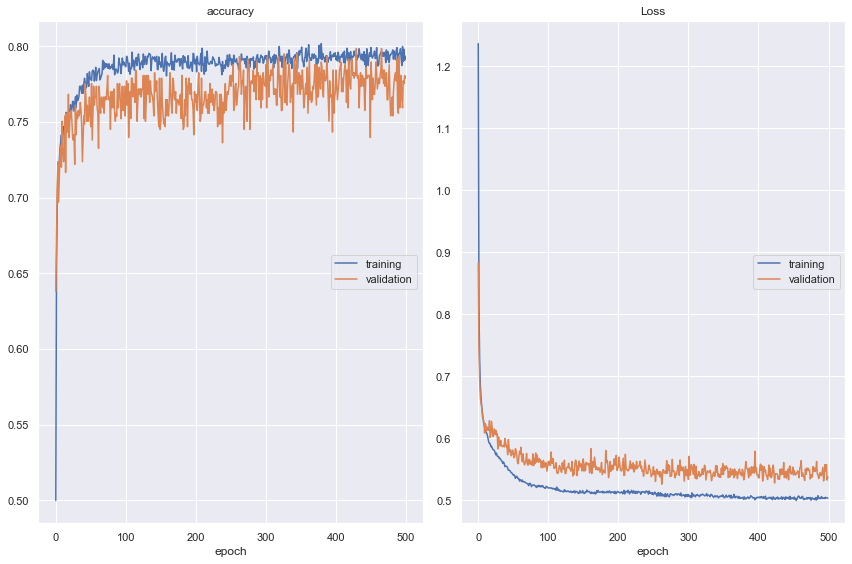

accuracy
	training         	 (min:    0.500, max:    0.802, cur:    0.793)
	validation       	 (min:    0.638, max:    0.799, cur:    0.779)
Loss
	training         	 (min:    0.500, max:    1.237, cur:    0.503)
	validation       	 (min:    0.526, max:    0.882, cur:    0.538)


In [73]:
from livelossplot import PlotLossesKeras
model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer_Adamw, metrics=['accuracy'])

# fit the keras model on the dataset
model_fit = model.fit(x_train, y_train,validation_data=(x_validate, y_validate), epochs= num_epochs, batch_size= batch_size, callbacks= [PlotLossesKeras()], verbose=verbose)

In [74]:
print(model_fit.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


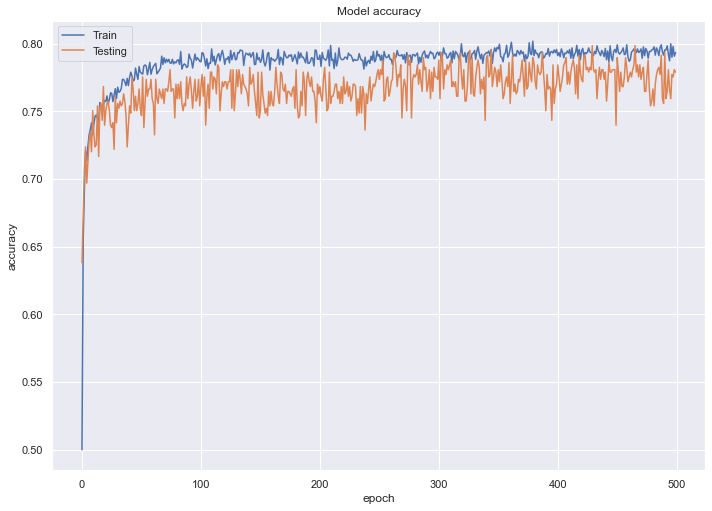

In [75]:
# summarize history for accuracy
plt.plot(model_fit.history['accuracy'])
plt.plot(model_fit.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Testing'], loc='upper left')
plt.show()

*Model preformance*

In [76]:
mlp_pred = model.predict(x_test)
mlp_pred = np.argmax(mlp_pred , axis = 1)
mlp_pred = mlp_pred.reshape((-1,1))

18/18 [==============================] - 0s 919us/step


In [77]:
#evalute model preformance
score = model.evaluate(x_test, y_test, verbose=1)
print('Loss: %.2f' % ( score[0]))
print('Accuracy: %.2f' % ( score[1]*100))

18/18 [==============================] - 0s 2ms/step - loss: 0.5575 - accuracy: 0.7558
Loss: 0.56
Accuracy: 75.58


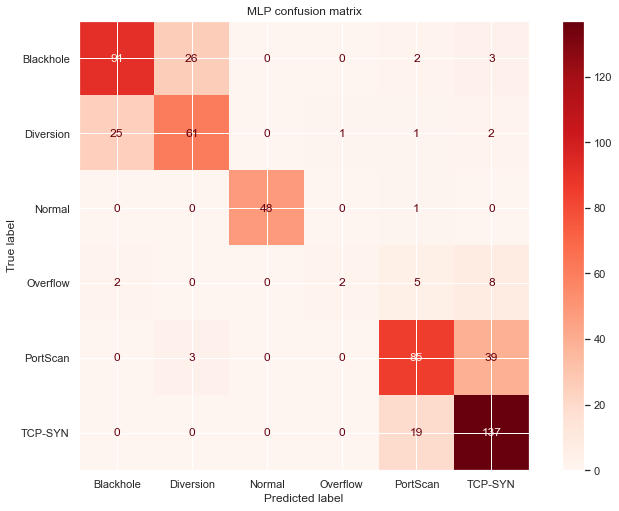

In [78]:
mlp_conv = con_matrix(y_test, mlp_pred ,'MLP confusion matrix')

## *Training and testing losses vs. the number of epochs*

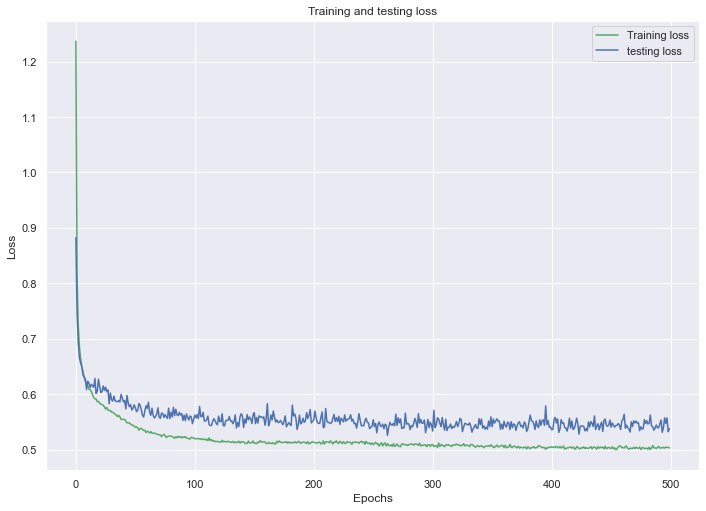

In [79]:
training_loss = model_fit.history['loss']
test_loss  = model_fit.history['val_loss']

# plot loss
plt.plot(training_loss, 'g', label='Training loss')
plt.plot(test_loss , 'b', label='testing loss')
plt.title('Training and testing loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

## *The table*

82/82 [==============================] - 0s 1ms/step - loss: 0.4880 - accuracy: 0.8068
accuracy of train : 80.68%
accuracy of test : 72.91%


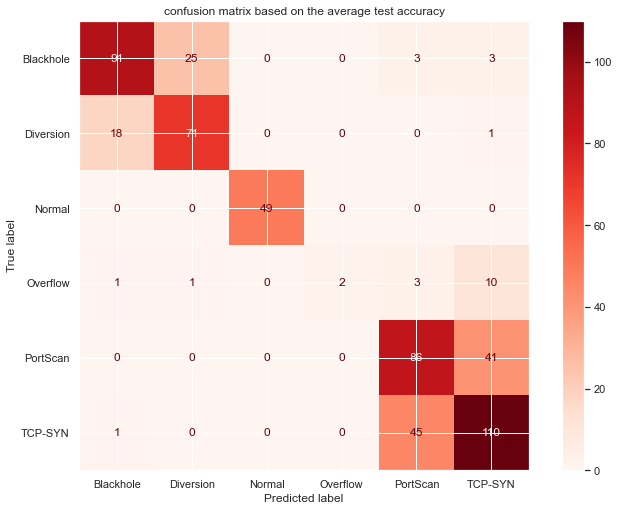

82/82 [==============================] - 0s 1ms/step - loss: 0.4769 - accuracy: 0.8114
accuracy of train : 81.14%
accuracy of test : 71.84%


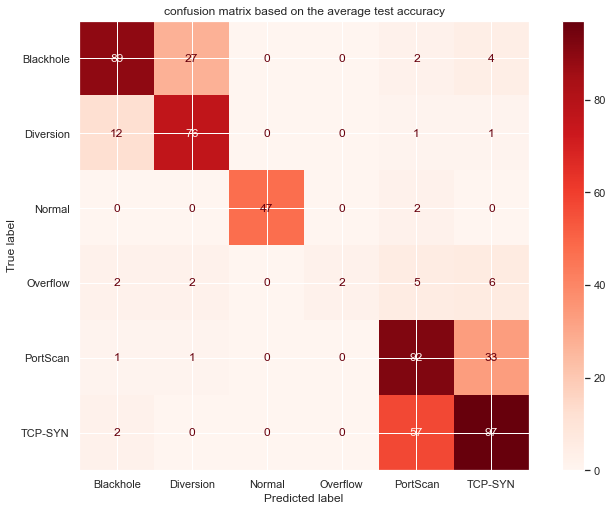

82/82 [==============================] - 0s 1ms/step - loss: 0.4861 - accuracy: 0.8015
accuracy of train : 80.15%
accuracy of test : 75.58%


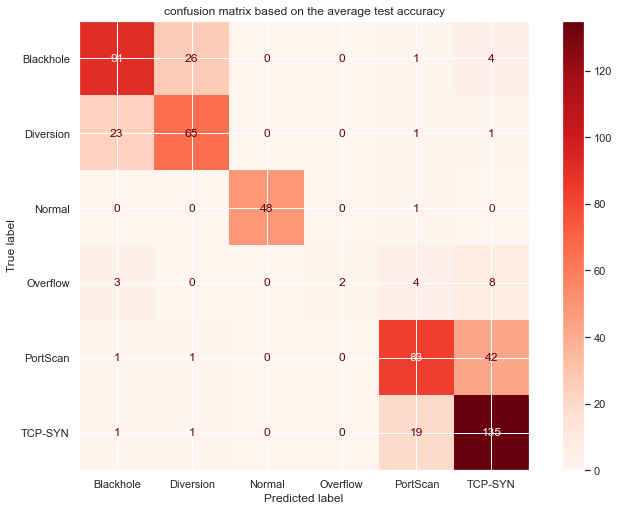

82/82 [==============================] - 0s 1ms/step - loss: 0.4845 - accuracy: 0.8022
accuracy of train : 80.22%
accuracy of test : 78.07%


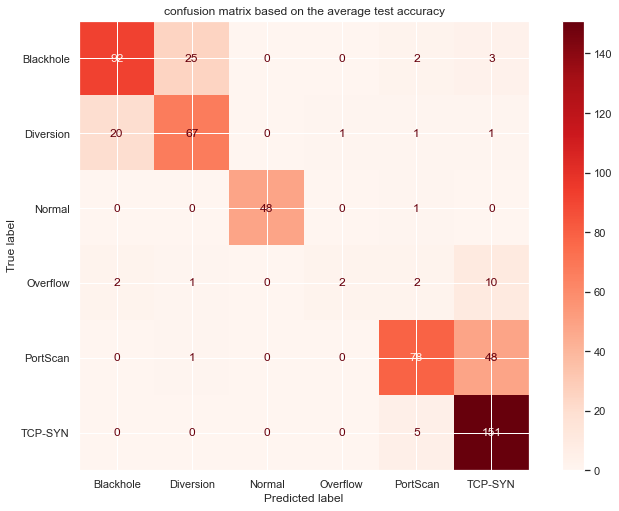

82/82 [==============================] - 0s 1ms/step - loss: 0.4804 - accuracy: 0.8057
accuracy of train : 80.57%
accuracy of test : 75.22%


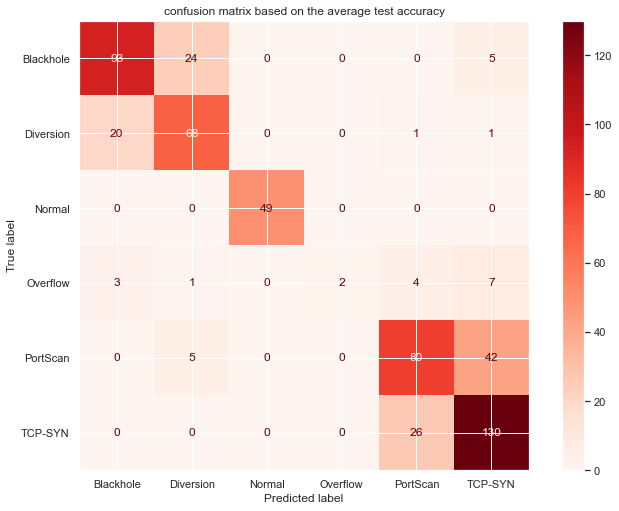

In [80]:
acc_train=[]
acc_test=[]
#-----------------------#
loss_train=[]
loss_test=[]
#-----------------------#
final_conv= np.zeros((6,6))
#-----------------------#
for i in range(0,5):
  mod = MLP_base(x_train,y_train,x_validate,y_validate,num_epochs,batch_size,verbose,optimizer_Adamw)
  #---------------------------------------------------------------#
  predicted = mod.predict(x_test)
  predicted = np.argmax(predicted , axis = 1)
  predicted = predicted.reshape((-1,1))
  scores_test = mod.evaluate(x_test, y_test, verbose=1)
  scores_train = mod.evaluate(x_train, y_train, verbose=1)

  acc_test.append(scores_test[1] * 100)   
  loss_test.append(scores_test[0])

  acc_train.append(scores_train[1] * 100)   
  loss_train.append(scores_train[0])
  #---------------------------------------------------------------#
  print("%s: %.2f%%" % ('accuracy of train ', scores_train[1]*100))
  print("%s: %.2f%%" % ('accuracy of test ', scores_test[1]*100))
  #---------------------------------------------------------------#
  final_conv += con_matrix(y_test,predicted ,'confusion matrix based on the average test accuracy')

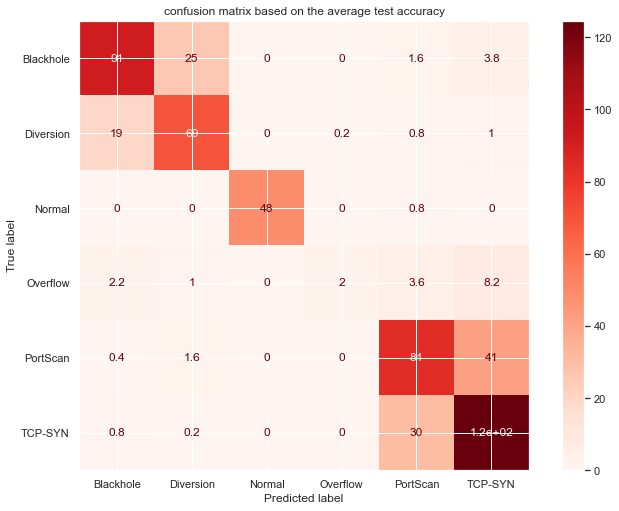

In [81]:
avg_con = final_conv/5
cm_display = ConfusionMatrixDisplay(avg_con,display_labels= train_classes).plot(cmap=plt.cm.Reds)
plt.title('confusion matrix based on the average test accuracy')
plt.show()

In [82]:
mlp_history = {
    'N': range(0,5),
    'Accuracy of train' : acc_train,
    'Loss of train': loss_train,
    'Accuracy of test' : acc_test,
    'Loss of test': loss_test
    }
mlp_history = pd.DataFrame.from_dict(mlp_history)
#-----------------------------------------------------#
max_Acc_train = mlp_history['Accuracy of train'].max()
max_Acc_test  = mlp_history['Accuracy of test' ].max()

min_Acc_train = mlp_history['Accuracy of train'].min()
min_Acc_test  = mlp_history['Accuracy of test'].min()

avg_Acc_train = mlp_history['Accuracy of train'].mean()
avg_Acc_test  = mlp_history['Accuracy of test'].mean()

In [83]:
# import module
from tabulate import tabulate
 
# assign data
mydata = [
  ['Max training acc',max_Acc_train],
  ['Max test acc' ,max_Acc_test ],
  ['Min training acc',min_Acc_train],
  ['Min test acc',min_Acc_test ],
  ['Avg training acc',avg_Acc_train],
  ['Avg test acc',avg_Acc_test ]
]
 
# create header
head = ["Accuracy " , "Values"]

# display table
print(tabulate(mydata, headers=head, tablefmt="grid"))

+------------------+----------+
| Accuracy         |   Values |
+==================+==========+
| Max training acc |  81.1378 |
+------------------+----------+
| Max test acc     |  78.0749 |
+------------------+----------+
| Min training acc |  80.1451 |
+------------------+----------+
| Min test acc     |  71.836  |
+------------------+----------+
| Avg training acc |  80.5498 |
+------------------+----------+
| Avg test acc     |  74.7237 |
+------------------+----------+


## *2D TSNE plots*

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 2619 samples in 0.000s...


C:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computed neighbors for 2619 samples in 0.455s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2619
[t-SNE] Computed conditional probabilities for sample 2000 / 2619
[t-SNE] Computed conditional probabilities for sample 2619 / 2619
[t-SNE] Mean sigma: 1.828391
[t-SNE] Computed conditional probabilities in 0.117s
[t-SNE] Iteration 50: error = 71.6167679, gradient norm = 0.0688902 (50 iterations in 0.423s)
[t-SNE] Iteration 100: error = 62.9242630, gradient norm = 0.0151542 (50 iterations in 0.360s)
[t-SNE] Iteration 150: error = 61.2519455, gradient norm = 0.0074777 (50 iterations in 0.365s)
[t-SNE] Iteration 200: error = 60.6394806, gradient norm = 0.0037389 (50 iterations in 0.390s)
[t-SNE] Iteration 250: error = 60.3560791, gradient norm = 0.0032847 (50 iterations in 0.349s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 60.356079
[t-SNE] Iteration 300: error = 0.8122440, gradient norm = 0.0010443 (50 iterations in 0.360s)
[t-SNE] Iteration

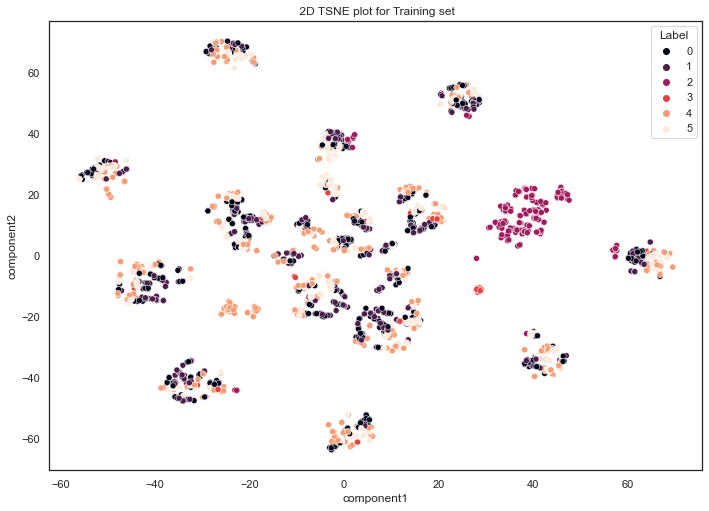

In [84]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
Visulaize_Data(x_train,y_train,' 2D TSNE plot for Training set')

C:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 561 samples in 0.000s...
[t-SNE] Computed neighbors for 561 samples in 0.011s...
[t-SNE] Computed conditional probabilities for sample 561 / 561
[t-SNE] Mean sigma: 2.578976
[t-SNE] Computed conditional probabilities in 0.031s
[t-SNE] Iteration 50: error = 62.2448807, gradient norm = 0.4502279 (50 iterations in 0.079s)
[t-SNE] Iteration 100: error = 62.5240784, gradient norm = 0.4580826 (50 iterations in 0.083s)
[t-SNE] Iteration 150: error = 63.2146797, gradient norm = 0.4396695 (50 iterations in 0.097s)
[t-SNE] Iteration 200: error = 63.0395355, gradient norm = 0.4483556 (50 iterations in 0.075s)
[t-SNE] Iteration 250: error = 62.9981117, gradient norm = 0.4441743 (50 iterations in 0.079s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 62.998112
[t-SNE] Iteration 300: error = 0.5924965, gradient norm = 0.0024209 (50 iterations in 0.078s)
[t-SNE] Iteration 350: error = 0.5472692, gradient norm = 0.0007171 

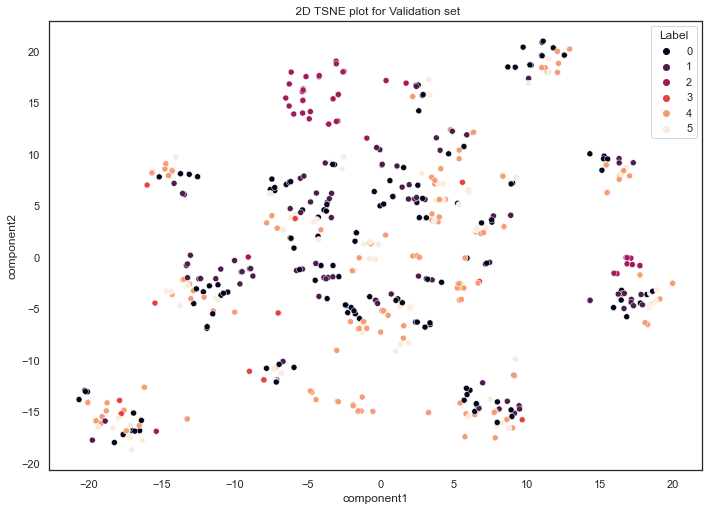

In [85]:
Visulaize_Data(x_validate,y_validate,' 2D TSNE plot for Validation set')

C:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 561 samples in 0.004s...
[t-SNE] Computed neighbors for 561 samples in 0.012s...
[t-SNE] Computed conditional probabilities for sample 561 / 561
[t-SNE] Mean sigma: 2.612832
[t-SNE] Computed conditional probabilities in 0.031s
[t-SNE] Iteration 50: error = 63.2187080, gradient norm = 0.4477683 (50 iterations in 0.094s)
[t-SNE] Iteration 100: error = 63.2154999, gradient norm = 0.4423039 (50 iterations in 0.094s)
[t-SNE] Iteration 150: error = 62.7408600, gradient norm = 0.4526083 (50 iterations in 0.110s)
[t-SNE] Iteration 200: error = 62.6546707, gradient norm = 0.4434146 (50 iterations in 0.109s)
[t-SNE] Iteration 250: error = 62.8558464, gradient norm = 0.4600461 (50 iterations in 0.110s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 62.855846
[t-SNE] Iteration 300: error = 0.5796217, gradient norm = 0.0016642 (50 iterations in 0.079s)
[t-SNE] Iteration 350: error = 0.5387730, gradient norm = 0.0008762 

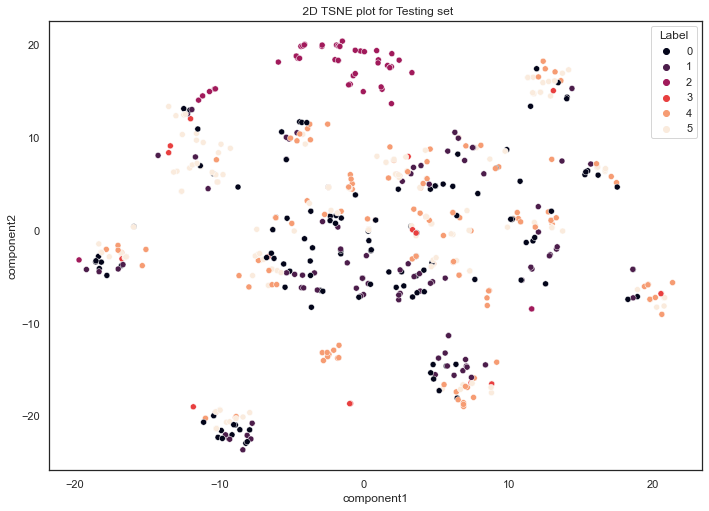

In [86]:
Visulaize_Data(x_test,y_test,' 2D TSNE plot for Testing set')

# **Q2**

##  **Dimensionality reduction**

### *PCA*

In [41]:
from sklearn.decomposition import PCA
pca_acc =[]
for i in range(2,19):
  pca = PCA(n_components=i, random_state= 0)
  trans_tarin = pca.fit_transform(x_train)
  trans_val = pca.transform(x_validate)
  trans_test = pca.transform(x_test)
  #---------------------------------------------------------------------------------------------------#
  modelpca = MLP(trans_tarin,y_train,trans_val,y_validate,num_epochs,batch_size,verbose,optimizer_Adamw)
  #------------------------------------------------------------------------------------------------------#
  score_pca = modelpca.evaluate(trans_test, y_test, verbose=verbose)
  pca_acc.append(score_pca)

In [42]:
acc_pca = np.array(pca_acc)
loss = acc_pca[:,0]
accp = acc_pca[:,1]
pca_scores = {
    'N': range(2,19),
    'Accuracy' : accp,
    'Losses' : loss    
    }
pca_scores = pd.DataFrame(pca_scores)

In [43]:
pca_scores.head()

,N,Accuracy,Losses
0,2,0.525847,1.087431
1,3,0.616756,0.835768
2,4,0.632799,0.811907
3,5,0.655971,0.829815
4,6,0.636364,0.861001


Best value of n-components: 18
Best Accuracy is : 0.7005347609519958


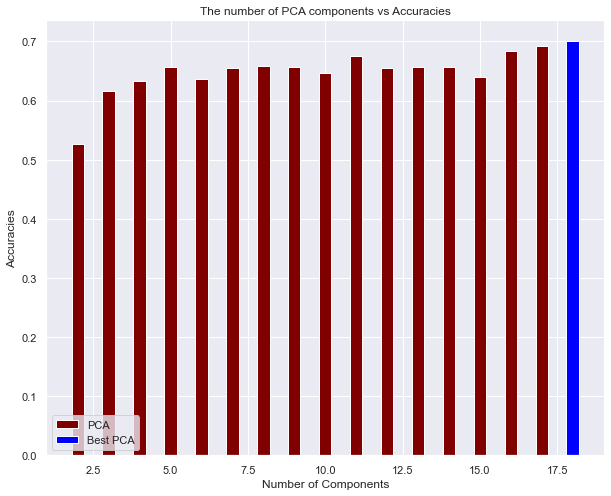

In [46]:
pca_best_N_comp = pca_scores.loc[pca_scores['Accuracy'] == 
                                 pca_scores['Accuracy'].max(), 'N'].values[0]
print('Best value of n-components: {}'.format(pca_best_N_comp))
print('Best Accuracy is : {}'.format(pca_scores['Accuracy'].max()))
#---------------------------------------------------------------------#
plt.figure(figsize=(10,8))
plt.bar(pca_scores['N'], pca_scores['Accuracy'], color ='maroon', width = 0.4,label = 'PCA')
plt.bar(pca_best_N_comp, pca_scores['Accuracy'].max(), color ='blue', width = 0.4,label = 'Best PCA')
# plt.axhline(y= score[1], color='k', linestyle='--',label = 'Baseline')
plt.xlabel("Number of Components")
plt.ylabel("Accuracies")
plt.title("The number of PCA components vs Accuracies")
plt.legend(loc='lower left')
plt.show()

In [47]:
#fit pca model based on best n_components 
pca = PCA(n_components= pca_best_N_comp, random_state= 0)
pca_tarin = pca.fit_transform(x_train)
pac_val = pca.transform(x_validate)
pac_test = pca.transform(x_test)

In [48]:
#mlp model with pca data
model_pca = MLP(pca_tarin,y_train,pac_val,y_validate,num_epochs,batch_size,verbose,optimizer_Adamw)

test_acc_pca = model_pca.evaluate(pac_test, y_test, verbose=verbose)[1]
valid_acc_pca = model_pca.evaluate(pac_val, y_validate, verbose=verbose)[1]
print('Test accuracy is {} %'.format(test_acc_pca * 100))
print('Validation accuracy is {} %'.format(valid_acc_pca *100))

Test accuracy is 66.66666865348816 %
Validation accuracy is 68.09269189834595 %


### *2D TSNE plots*

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 2619 samples in 0.000s...
[t-SNE] Computed neighbors for 2619 samples in 0.107s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2619


C:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computed conditional probabilities for sample 2000 / 2619
[t-SNE] Computed conditional probabilities for sample 2619 / 2619
[t-SNE] Mean sigma: 1.500909
[t-SNE] Computed conditional probabilities in 0.125s
[t-SNE] Iteration 50: error = 70.2080917, gradient norm = 0.0678349 (50 iterations in 0.454s)
[t-SNE] Iteration 100: error = 60.3912354, gradient norm = 0.0201578 (50 iterations in 0.397s)
[t-SNE] Iteration 150: error = 58.5122032, gradient norm = 0.0092881 (50 iterations in 0.380s)
[t-SNE] Iteration 200: error = 57.7931480, gradient norm = 0.0054829 (50 iterations in 0.395s)
[t-SNE] Iteration 250: error = 57.4312515, gradient norm = 0.0047084 (50 iterations in 0.364s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 57.431252
[t-SNE] Iteration 300: error = 0.7837737, gradient norm = 0.0009500 (50 iterations in 0.365s)
[t-SNE] Iteration 350: error = 0.5724781, gradient norm = 0.0003183 (50 iterations in 0.365s)
[t-SNE] Iteration 400: error = 0.5079032, grad

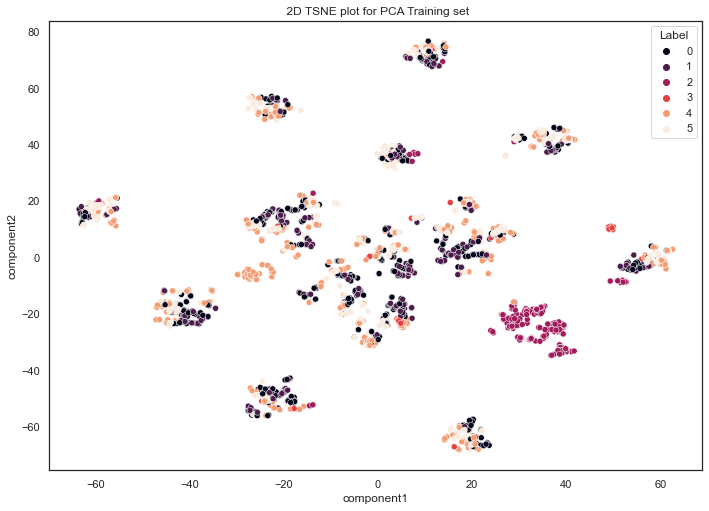

In [93]:
Visulaize_Data(trans_tarin,y_train,' 2D TSNE plot for PCA Training set')

C:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 561 samples in 0.000s...
[t-SNE] Computed neighbors for 561 samples in 0.013s...
[t-SNE] Computed conditional probabilities for sample 561 / 561
[t-SNE] Mean sigma: 2.284725
[t-SNE] Computed conditional probabilities in 0.038s
[t-SNE] Iteration 50: error = 62.9022598, gradient norm = 0.4433695 (50 iterations in 0.087s)
[t-SNE] Iteration 100: error = 63.1494751, gradient norm = 0.4326200 (50 iterations in 0.079s)
[t-SNE] Iteration 150: error = 62.9005966, gradient norm = 0.4414839 (50 iterations in 0.102s)
[t-SNE] Iteration 200: error = 63.7069702, gradient norm = 0.4428175 (50 iterations in 0.070s)
[t-SNE] Iteration 250: error = 63.5045204, gradient norm = 0.4265050 (50 iterations in 0.078s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 63.504520
[t-SNE] Iteration 300: error = 0.5802591, gradient norm = 0.0017919 (50 iterations in 0.078s)
[t-SNE] Iteration 350: error = 0.5336356, gradient norm = 0.0005205 

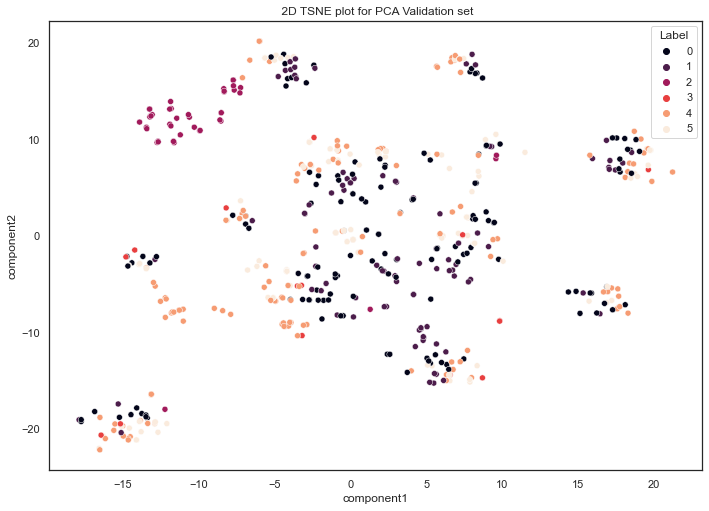

In [94]:
Visulaize_Data(trans_val,y_validate,' 2D TSNE plot for PCA Validation set')

C:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 561 samples in 0.000s...
[t-SNE] Computed neighbors for 561 samples in 0.016s...
[t-SNE] Computed conditional probabilities for sample 561 / 561
[t-SNE] Mean sigma: 2.316983
[t-SNE] Computed conditional probabilities in 0.031s
[t-SNE] Iteration 50: error = 62.7706833, gradient norm = 0.4530720 (50 iterations in 0.094s)
[t-SNE] Iteration 100: error = 62.4621925, gradient norm = 0.4403380 (50 iterations in 0.079s)
[t-SNE] Iteration 150: error = 63.7870178, gradient norm = 0.4211865 (50 iterations in 0.097s)
[t-SNE] Iteration 200: error = 62.5249100, gradient norm = 0.4446712 (50 iterations in 0.081s)
[t-SNE] Iteration 250: error = 62.2575531, gradient norm = 0.4349436 (50 iterations in 0.091s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 62.257553
[t-SNE] Iteration 300: error = 0.5677015, gradient norm = 0.0015791 (50 iterations in 0.063s)
[t-SNE] Iteration 350: error = 0.5089533, gradient norm = 0.0010003 

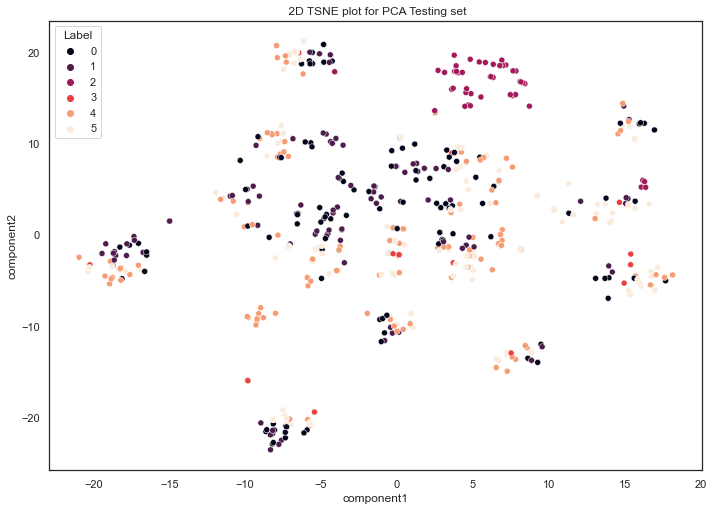

In [95]:
Visulaize_Data(trans_test,y_test,' 2D TSNE plot for PCA Testing set')

## **Feature selection**

### *ANOVA*

In [49]:
from sklearn.feature_selection import f_classif
ANOVA_accs =[]
for i in range(1,19):
  ANOVA = SelectKBest(f_classif, k=i)
  ANOVA.fit(x_train, y_train)
  X_train_ANOVA = ANOVA.transform(x_train)
  x_validate_ANOVA = ANOVA.transform(x_validate)
  X_test_ANOVA = ANOVA.transform(x_test) 
  #---------------------------------------------------------------------------------------------------#
  model_ANOVA = MLP(X_train_ANOVA,y_train,x_validate_ANOVA,y_validate,num_epochs,batch_size,verbose,optimizer_Adamw)
  #------------------------------------------------------------------------------------------------------#
  acu = model_ANOVA.evaluate(X_test_ANOVA, y_test, verbose=verbose)
  ANOVA_accs.append(acu)

In [50]:
ANOVA_accs = np.array(ANOVA_accs)
ANOVA_loss = ANOVA_accs[:,0]
ANOVA_accp = ANOVA_accs[:,1]
ANOVA_accs = {
    'N': range(1,19),
    'Accuracy' : ANOVA_accp,
    'Losses' : ANOVA_loss
    
    }
ANOVA_accs = pd.DataFrame(ANOVA_accs)

In [51]:
ANOVA_accs.head()

,N,Accuracy,Losses
0,1,0.572192,1.165525
1,2,0.552585,1.180999
2,3,0.577540,1.123804
3,4,0.709447,0.655456
4,5,0.707665,0.670546


Best number of features: 12
Best Accuracy is: 0.7629233598709106


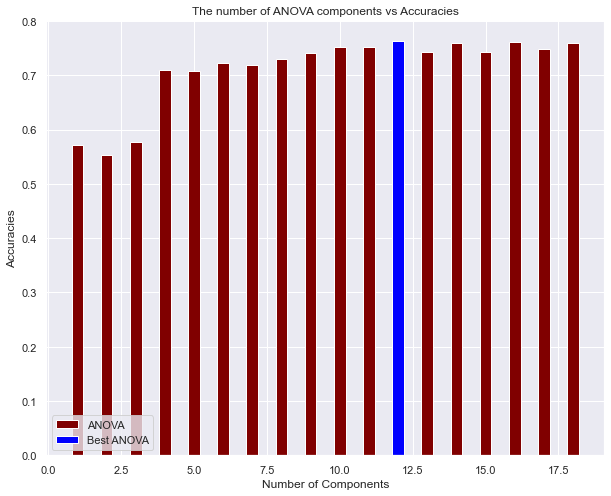

In [52]:
best_N_comp_ANOVA = ANOVA_accs.loc[ANOVA_accs['Accuracy'] == ANOVA_accs['Accuracy'].max(), 'N'].values[0]
print('Best number of features: {}'.format(best_N_comp_ANOVA))
print('Best Accuracy is: {}'.format(ANOVA_accs['Accuracy'].max()))
#---------------------------------------------------------------------#
plt.figure(figsize=(10,8))
plt.bar(ANOVA_accs['N'], ANOVA_accs['Accuracy'], color ='maroon', width = 0.4,label = 'ANOVA')
plt.bar(best_N_comp_ANOVA , ANOVA_accs['Accuracy'].max(), color ='blue', width = 0.4,label = 'Best ANOVA')
plt.xlabel("Number of Components")
plt.ylabel("Accuracies")
plt.title("The number of ANOVA components vs Accuracies")
plt.legend(loc='lower left')
plt.show()

In [53]:
#fit ANOVA model based on best number of features
ANOVA_selector = SelectKBest(f_classif, k= best_N_comp_ANOVA)
ANOVA_selector.fit(x_train, y_train)
train_ANOVA = ANOVA_selector.transform(x_train)
validate_ANOVA = ANOVA_selector.transform(x_validate)
test_ANOVA = ANOVA_selector.transform(x_test) 

In [92]:
#mlp model with ANOVA data
ANOVA = MLP(train_ANOVA,y_train,validate_ANOVA,y_validate,num_epochs,batch_size,verbose,optimizer_Adamw)

ANOVA_acc_test = ANOVA.evaluate(test_ANOVA, y_test, verbose=verbose)[1]
ANOVA_acc_valid = ANOVA.evaluate(validate_ANOVA, y_validate, verbose=verbose)[1]
print('Test accuracy is {}'.format(ANOVA_acc_test))
print('Validation accuracy is {}'.format(ANOVA_acc_valid))

Test accuracy is 0.7522281408309937
Validation accuracy is 0.7682709693908691


### *Mutual Information*

In [56]:
mutual_history =[]
for i in range(1,19):
  mutual_selector =  SelectKBest(mutual_info_classif, k=i)
  mutual_selector.fit(x_train, y_train)
  X_train_reduced = mutual_selector.transform(x_train)
  x_validate_reduced = mutual_selector.transform(x_validate)
  X_test_reduced = mutual_selector.transform(x_test) 
  #---------------------------------------------------------------------------------------------------#
  model_mutual = MLP(X_train_reduced,y_train,x_validate_reduced,y_validate,num_epochs,batch_size,verbose,optimizer_Adamw)
  #------------------------------------------------------------------------------------------------------#
  sc = model_mutual.evaluate(X_test_reduced, y_test, verbose=1)
  mutual_history.append(sc)

18/18 [==============================] - 0s 2ms/step - loss: 0.5793 - accuracy: 0.7611


In [57]:
mutual_history = np.array(mutual_history)
loss_mutual = mutual_history[:,0]
accp_mutual = mutual_history[:,1]
mutual_history = {
    'N': range(1,19),
    'Accuracy' : accp_mutual,
    'Losses' : loss_mutual
    }
mutual_history = pd.DataFrame(mutual_history)

In [58]:
mutual_history.head()

,N,Accuracy,Losses
0,1,0.570410,1.009287
1,2,0.705882,0.742567
2,3,0.707665,0.685208
3,4,0.698752,0.685792
4,5,0.705882,0.677961


Best number of features: 18
Best Accuracy is: 0.7611408233642578


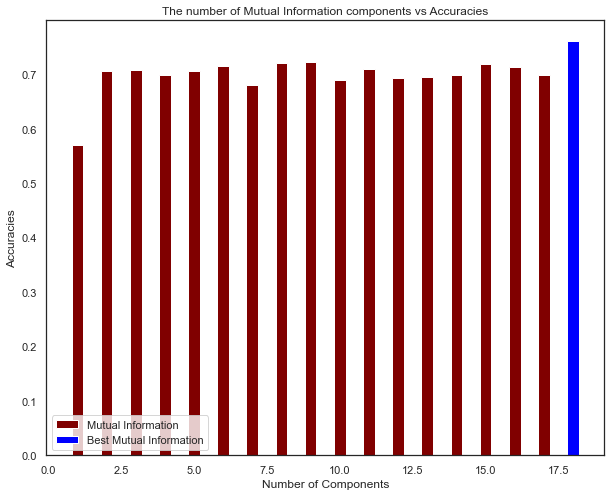

In [93]:
best_N_comp_mulut = mutual_history.loc[mutual_history['Accuracy'] == mutual_history['Accuracy'].max(), 'N'].values[0]
print('Best number of features: {}'.format(best_N_comp_mulut))
print('Best Accuracy is: {}'.format(mutual_history['Accuracy'].max()))
#---------------------------------------------------------------------#
plt.figure(figsize=(10,8))
plt.bar(mutual_history['N'], mutual_history['Accuracy'], color ='maroon', width = 0.4,label = 'Mutual Information')
plt.bar(best_N_comp_mulut , mutual_history['Accuracy'].max(), color ='blue', width = 0.4,label = 'Best Mutual Information')
plt.xlabel("Number of Components")
plt.ylabel("Accuracies")
plt.title("The number of Mutual Information components vs Accuracies")
plt.legend(loc='lower left')
plt.show()

In [61]:
mutual =  SelectKBest(mutual_info_classif, k=best_N_comp_mulut)
mutual.fit(x_train, y_train)
X_train_mutual = mutual.transform(x_train)
x_validate_mutual = mutual.transform(x_validate)
X_test_mutual = mutual.transform(x_test)

In [62]:
model_mutual = MLP(X_train_mutual,y_train,x_validate_mutual,y_validate,num_epochs,batch_size,verbose,optimizer_Adamw)

multu_acc_test = model_mutual.evaluate(X_test_mutual, y_test, verbose=0)[1]
multu_acc_valid = model_mutual.evaluate(x_validate_mutual, y_validate, verbose=0)[1]
print('Test accuracy is {}'.format(multu_acc_test))
print('Validation accuracy is {}'.format(multu_acc_valid))

Test accuracy is 0.7754010558128357
Validation accuracy is 0.7647058963775635


### *Choosing the method that achieves the best test accuracy*

In [94]:
maxf = [ANOVA_acc_test,multu_acc_test]
namefs = ['ANOVA','Mutual Information']
maxfs = {
    'Feature selection Models':namefs ,
    'Accuracy' : maxf
    }

fs = pd.DataFrame(maxfs)
fs
best_acc_fs = fs.loc[fs['Accuracy'] == fs['Accuracy'].max(), 'Feature selection Models'].values[0]

print('Method that achieves the best test accuracy is --> {}'.format(best_acc_fs))

Method that achieves the best test accuracy is --> Mutual Information


### *2D TSNE plots*

C:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 2619 samples in 0.001s...
[t-SNE] Computed neighbors for 2619 samples in 0.131s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2619
[t-SNE] Computed conditional probabilities for sample 2000 / 2619
[t-SNE] Computed conditional probabilities for sample 2619 / 2619
[t-SNE] Mean sigma: 0.146876
[t-SNE] Computed conditional probabilities in 0.123s
[t-SNE] Iteration 50: error = 69.9221649, gradient norm = 0.0678829 (50 iterations in 0.519s)
[t-SNE] Iteration 100: error = 60.1132698, gradient norm = 0.0169156 (50 iterations in 0.445s)
[t-SNE] Iteration 150: error = 58.6941833, gradient norm = 0.0097556 (50 iterations in 0.452s)
[t-SNE] Iteration 200: error = 58.0886002, gradient norm = 0.0051377 (50 iterations in 0.437s)
[t-SNE] Iteration 250: error = 57.7564354, gradient norm = 0.0056119 (50 iterations in 0.448s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 57.756435
[t-SNE] Iteration 300: err

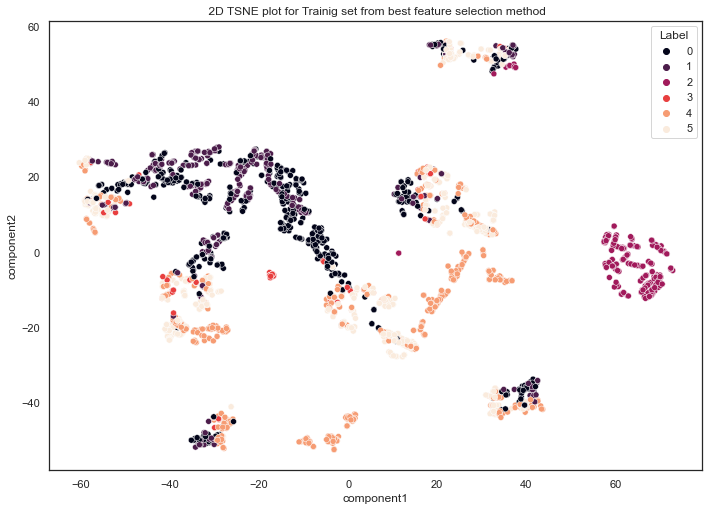

C:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 561 samples in 0.001s...
[t-SNE] Computed neighbors for 561 samples in 0.026s...
[t-SNE] Computed conditional probabilities for sample 561 / 561
[t-SNE] Mean sigma: 0.503873
[t-SNE] Computed conditional probabilities in 0.030s
[t-SNE] Iteration 50: error = 59.9842606, gradient norm = 0.4662089 (50 iterations in 0.100s)
[t-SNE] Iteration 100: error = 60.7262688, gradient norm = 0.4559392 (50 iterations in 0.101s)
[t-SNE] Iteration 150: error = 60.3730698, gradient norm = 0.4554942 (50 iterations in 0.097s)
[t-SNE] Iteration 200: error = 59.8328590, gradient norm = 0.4715344 (50 iterations in 0.099s)
[t-SNE] Iteration 250: error = 60.5821686, gradient norm = 0.4549693 (50 iterations in 0.120s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 60.582169
[t-SNE] Iteration 300: error = 0.4024383, gradient norm = 0.0024559 (50 iterations in 0.083s)
[t-SNE] Iteration 350: error = 0.3736060, gradient norm = 0.0006024 

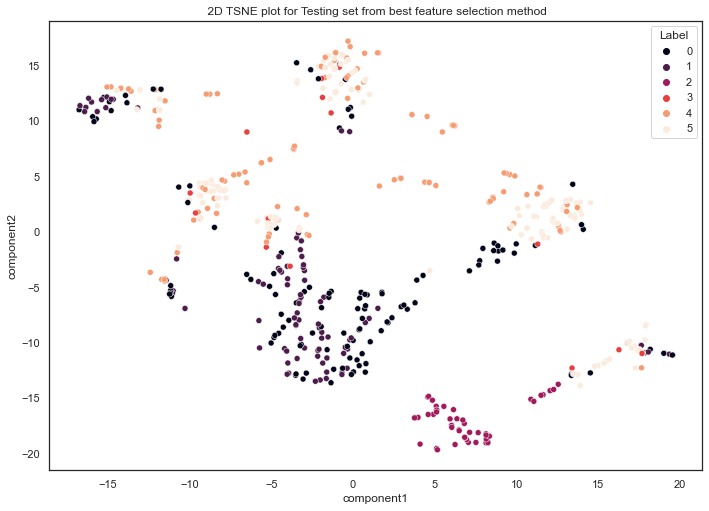

In [95]:
if best_acc_fs == 'ANOVA':
  Visulaize_Data(train_ANOVA,y_train,' 2D TSNE plot for Trainig set from best feature selection method')
  Visulaize_Data(test_ANOVA,y_test,' 2D TSNE plot for Testing set from best feature selection method')
elif best_acc_fs == 'Mutual Information':
  Visulaize_Data(X_train_mutual,y_train,' 2D TSNE plot for Trainig set from best feature selection method')
  Visulaize_Data(X_test_mutual,y_test,' 2D TSNE plot for Testing set from best feature selection method')

## **Preparation to next steps**

In [96]:
validation_accs = [valid_acc_pca ,  ANOVA_acc_valid ,multu_acc_valid ]
models_name = ['PCA' ,'ANOVA','Mutual Information']
val_dic = {
    'Models':models_name ,
    'Validation accuracy' : validation_accs
    }

val_df = pd.DataFrame(val_dic)

best_val_acc = val_df.loc[val_df['Validation accuracy'] == val_df['Validation accuracy'].max(), 'Models'].values[0]
print('Method that achieves the best validation accuracy is --> {}'.format(best_val_acc))

Method that achieves the best validation accuracy is --> ANOVA


*Updating dataset & Confusion matrix*

18/18 [==============================] - 0s 1ms/step


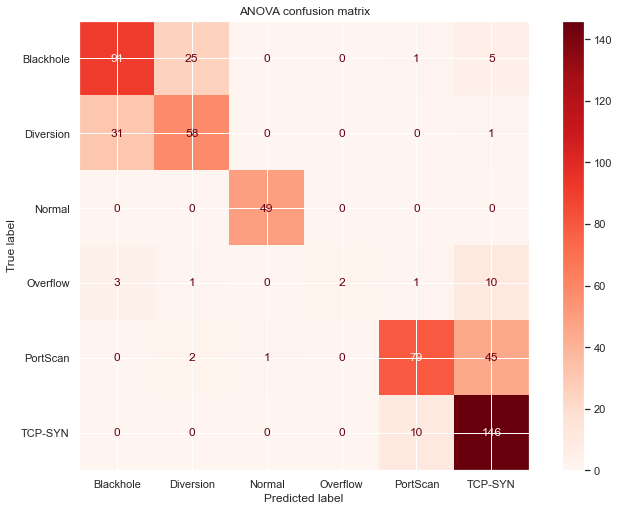

In [67]:
if best_val_acc == 'PCA':
  #update the dataset
  newtrain =pca_tarin    
  newvalidate =pac_val
  newtest =pac_test 
  #plot confusion matrix
  pca_pred = pca.predict(pac_test)
  pca_pred = np.argmax(pca_pred , axis = 1)
  pca_pred = pca_pred.reshape((-1,1))
  pca_conv = con_matrix(y_test,pca_pred ,'pca confusion matrix')

elif best_val_acc == 'ANOVA':
  #update the dataset
  newtrain =train_ANOVA    
  newvalidate =validate_ANOVA 
  newtest =test_ANOVA 
  #plot confusion matrix
  ANOVA_pred = ANOVA.predict(test_ANOVA)
  ANOVA_pred = np.argmax(ANOVA_pred , axis = 1)
  ANOVA_pred = ANOVA_pred.reshape((-1,1))
  ANOVA_conv = con_matrix(y_test,ANOVA_pred ,'ANOVA confusion matrix')

else:   
  #update the dataset
  newtrain =X_train_mutual   
  newvalidate =x_validate_mutual
  newtest =X_test_mutual
  #plot confusion matrix
  mutual_pred = mutual.predict(X_test_mutual)
  mutual_pred = np.argmax(mutual_pred , axis = 1)
  mutual_pred = mutual_pred.reshape((-1,1))
  mutual_conv = con_matrix(y_test,mutual_pred ,'mutual confusion matrix')

# **Q3**

## **1) Vary the Batch size**

In [69]:
Bs_total= [32,64,128] 
dictry1= []
dictry2= []
dictry3= []
for Bs in Bs_total :
  dictry = multiple_fit(5 ,newtrain,y_train,newtest, y_test,newvalidate,y_validate,optimizer_Adamw,Bs,num_epochs,verbose,PLot_Loss=False)
  dictry1.append(summary(dictry["Acc_Train"],'Train'))
  dictry2.append(summary(dictry["Acc_Test"],'Test'))
  dictry3.append(summary(dictry["Acc_Validation"],'Validation'))

In [70]:
train_ta = pd.DataFrame(dictry1) 
train_ta['batch size'] = Bs_total
train_ta

,Train Acc_min,Train Acc_max,Train Acc_avg,batch size
0,0.717831,0.733868,0.723253,32
1,0.708667,0.728141,0.719893,64
2,0.692631,0.717831,0.704696,128


In [71]:
test_ta = pd.DataFrame(dictry2) 
test_ta['batch size'] = Bs_total
test_ta

,Test Acc_min,Test Acc_max,Test Acc_avg,batch size
0,0.732620,0.752228,0.745098,32
1,0.732620,0.752228,0.740463,64
2,0.720143,0.739750,0.727629,128


In [72]:
vali_ta = pd.DataFrame(dictry3) 
vali_ta['batch size'] = Bs_total
vali_ta

,Validation Acc_min,Validation Acc_max,Validation Acc_avg,batch size
0,0.716578,0.737968,0.725490,32
1,0.718360,0.736185,0.725490,64
2,0.696970,0.721925,0.709804,128


In [73]:
Best_batch_size= vali_ta.loc[vali_ta['Validation Acc_avg'] == vali_ta['Validation Acc_avg'].max(), 'batch size'].values[0]
print("Best batch size is --> {}" .format(Best_batch_size))

Best batch size is --> 64


## **2) Vary Hidden layers vs. neurons/layer**

In [74]:
ls_dict  = []
neurons = [10,20,30,40]
hidden_layers = [1,2,4,8]

for neu in neurons:
  for num in hidden_layers:
    d = multiple_fit(5 ,newtrain,y_train,newtest,
                     y_test,newvalidate,y_validate,optimizer_Adamw,Best_batch_size,num_epochs,verbose,num,neu,PLot_Loss=False)
    train_summ = summary(d["Acc_Train"],'Train')
    test_summ = summary(d["Acc_Test"],'Test')
    valid_summ = summary(d["Acc_Validation"],'Validation')

    All= {
        "Hidden layers":num ,
        "Number of neurons":neu,

        "Max train acc":train_summ["Train Acc_max"] ,
        "Min train acc":train_summ["Train Acc_min"],
        "Avg train acc":train_summ["Train Acc_avg"],

        "Max test acc":test_summ["Test Acc_max"],
        "Min test acc":test_summ["Test Acc_min"],
        "Avg test acc":test_summ["Test Acc_avg"], 


        "Max val acc":valid_summ["Validation Acc_max"],
        "Min val acc":valid_summ["Validation Acc_min"],
        "Avg val acc":valid_summ["Validation Acc_avg"]
    }
    ls_dict.append(All)
all = pd.DataFrame.from_dict(ls_dict)

In [75]:
data_1_layer = all[all['Hidden layers'] == 1 ]
data_1_layer

,Hidden layers,Number of neurons,Max train acc,Min train acc,Avg train acc,Max test acc,Min test acc,Avg test acc,Max val acc,Min val acc,Avg val acc
0,1,10,0.716304,0.697595,0.709966,0.757576,0.725490,0.735472,0.721925,0.709447,0.716221
4,1,20,0.753723,0.725468,0.741428,0.771836,0.734403,0.750802,0.761141,0.721925,0.745811
8,1,30,0.759832,0.742650,0.750974,0.757576,0.752228,0.754367,0.771836,0.746881,0.755437
12,1,40,0.764796,0.750668,0.756014,0.764706,0.750446,0.757219,0.771836,0.752228,0.763280


In [76]:
data_2_layer = all[all['Hidden layers'] == 2 ]
data_2_layer

,Hidden layers,Number of neurons,Max train acc,Min train acc,Avg train acc,Max test acc,Min test acc,Avg test acc,Max val acc,Min val acc,Avg val acc
1,2,10,0.741123,0.726613,0.734632,0.768271,0.741533,0.753654,0.768271,0.729055,0.746168
5,2,20,0.767469,0.736923,0.757159,0.771836,0.748663,0.761854,0.773619,0.745098,0.763993
9,2,30,0.776250,0.762887,0.769301,0.777184,0.755793,0.764706,0.787879,0.761141,0.774688
13,2,40,0.781596,0.749905,0.770905,0.787879,0.752228,0.772193,0.791444,0.750446,0.773975


In [77]:
data_4_layer = all[all['Hidden layers'] == 4 ]
data_4_layer

,Hidden layers,Number of neurons,Max train acc,Min train acc,Avg train acc,Max test acc,Min test acc,Avg test acc,Max val acc,Min val acc,Avg val acc
2,4,10,0.758305,0.723559,0.745628,0.784314,0.746881,0.765062,0.759358,0.721925,0.745811
6,4,20,0.788469,0.772432,0.780069,0.791444,0.766488,0.774688,0.789661,0.775401,0.784670
10,4,30,0.793814,0.777396,0.786102,0.793226,0.766488,0.775758,0.793226,0.786096,0.790374
14,4,40,0.800305,0.791142,0.794807,0.796791,0.778966,0.786096,0.818182,0.786096,0.804278


In [78]:
data_8_layer = all[all['Hidden layers'] == 8 ]
data_8_layer

,Hidden layers,Number of neurons,Max train acc,Min train acc,Avg train acc,Max test acc,Min test acc,Avg test acc,Max val acc,Min val acc,Avg val acc
3,8,10,0.759450,0.738832,0.749599,0.768271,0.755793,0.761141,0.764706,0.741533,0.755437
7,8,20,0.794578,0.762123,0.779229,0.798574,0.770053,0.786096,0.803922,0.773619,0.791087
11,8,30,0.794196,0.776250,0.785032,0.805704,0.755793,0.779323,0.807487,0.786096,0.792513
15,8,40,0.819015,0.794196,0.807102,0.812834,0.777184,0.792157,0.823529,0.795009,0.809982


In [79]:
best_num_neurons =  all.loc[all["Avg val acc"].max() ==all["Avg val acc"],"Number of neurons"].values[0]
best_num_hidden =  all.loc[all["Avg val acc"].max() ==all["Avg val acc"],"Hidden layers"].values[0]

print('Neurons number that gives best validation accuracy is --> {}'.format(best_num_neurons))
print('Hidden layers number that gives the best validation accuracy is --> {}'.format(best_num_hidden))

Neurons number that gives best validation accuracy is --> 40
Hidden layers number that gives the best validation accuracy is --> 8


In [90]:
print(all.loc[all["Avg test acc"].max() ==all["Avg test acc"],"Number of neurons"].values[0])
print(all.loc[all["Avg test acc"].max() ==all["Avg test acc"],"Hidden layers"].values[0])

40
8


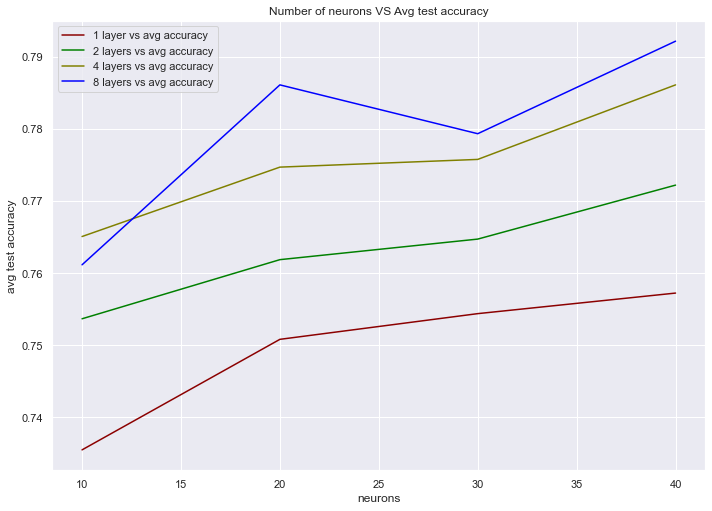

In [80]:
# plot 
# plt.figure(figsize=(9, 9))
plt.plot(neurons, data_1_layer['Avg test acc'], 'darkred', label = "1 layer vs avg accuracy")
plt.plot(neurons, data_2_layer['Avg test acc'], 'green',label = "2 layers vs avg accuracy")
plt.plot(neurons, data_4_layer['Avg test acc'] ,'olive', label = "4 layers vs avg accuracy")
plt.plot(neurons, data_8_layer['Avg test acc'],'blue', label = "8 layers vs avg accuracy")


plt.title('Number of neurons VS Avg test accuracy')
plt.xlabel('neurons')
plt.ylabel('avg test accuracy')
plt.legend()
plt.show()

## **3) Vary Learning rate and different optimizers**

In [81]:
optimizer_learning_rates = [0.1,0.01,0.001]
mo_nums = [0.1,0.5,0.9]
optimizers_name = ['AdamW','RMSprop','SGD']
ls_dict_opt  = []
#------------------------------------------------------------------------------#
for op_name in optimizers_name :
  if op_name == 'AdamW' or op_name == 'RMSprop':
    for lr_num in optimizer_learning_rates:
      opt_l = optimizersg(op_name ,lr_num)

      model_opt_fit = multiple_fit(5 ,newtrain,y_train,newtest,
                      y_test,newvalidate,y_validate,opt_l,Best_batch_size,num_epochs,verbose,best_num_hidden,best_num_neurons,PLot_Loss=False)

      train_opt = summary(model_opt_fit["Acc_Train"],'Train')
      test_opt = summary(model_opt_fit["Acc_Test"],'Test')
      valid_opt = summary(model_opt_fit["Acc_Validation"],'Validation')

      All_opt= {
          "Optimizer_name":op_name,
          "learning_rates":lr_num ,
          "Momentum_numbers": 'null' ,

          "Max train acc":train_opt["Train Acc_max"] ,
          "Min train acc":train_opt["Train Acc_min"],
          "Avg train acc":train_opt["Train Acc_avg"],

          "Max test acc":test_opt["Test Acc_max"],
          "Min test acc":test_opt["Test Acc_min"],
          "Avg test acc":test_opt["Test Acc_avg"],


          "Max val acc":valid_opt["Validation Acc_max"],
          "Min val acc":valid_opt["Validation Acc_min"],
          "Avg val acc":valid_opt["Validation Acc_avg"]
      }
      ls_dict_opt.append(All_opt)

  else:
    for mo_num in mo_nums :
      for lr_num in optimizer_learning_rates:
        opt_l = optimizersg(op_name ,lr_num, mo_num)


        model_opt_fit = multiple_fit(5 ,newtrain,y_train,newtest,
                      y_test,newvalidate,y_validate,opt_l,Best_batch_size,num_epochs,
                      verbose,best_num_hidden,best_num_neurons,PLot_Loss=False)
        train_opt = summary(model_opt_fit["Acc_Train"],'Train')
        test_opt = summary(model_opt_fit["Acc_Test"],'Test')
        valid_opt = summary(model_opt_fit["Acc_Validation"],'Validation')

        All_opt= {
          "Optimizer_name":op_name,
          "learning_rates":lr_num ,
          "Momentum_numbers":mo_num,
      

          "Max train acc":train_opt["Train Acc_max"] ,
          "Min train acc":train_opt["Train Acc_min"],
          "Avg train acc":train_opt["Train Acc_avg"],

          "Max test acc":test_opt["Test Acc_max"],
          "Min test acc":test_opt["Test Acc_min"],
          "Avg test acc":test_opt["Test Acc_avg"], 


          "Max val acc":valid_opt["Validation Acc_max"],
          "Min val acc":valid_opt["Validation Acc_min"],
          "Avg val acc":valid_opt["Validation Acc_avg"]
      }
      
        ls_dict_opt.append(All_opt)
#------------------------------------------------------------------------------#
All_opt = pd.DataFrame.from_dict(ls_dict_opt)

In [82]:
All_opt

,Optimizer_name,learning_rates,Momentum_numbers,Max train acc,Min train acc,Avg train acc,Max test acc,Min test acc,Avg test acc,Max val acc,Min val acc,Avg val acc
0,AdamW,0.100,null,0.799924,0.748377,0.781291,0.795009,0.764706,0.777184,0.814617,0.750446,0.785027
1,AdamW,0.010,null,0.802596,0.768996,0.789996,0.807487,0.777184,0.790374,0.819964,0.770053,0.801426
2,AdamW,0.001,null,0.815960,0.762505,0.790149,0.819964,0.748663,0.786096,0.828877,0.793226,0.806774
3,RMSprop,0.100,null,0.498282,0.254296,0.359221,0.518717,0.226381,0.362210,0.475936,0.251337,0.355793
4,RMSprop,0.010,null,0.786560,0.726613,0.759908,0.789661,0.748663,0.773975,0.802139,0.746881,0.772193
5,RMSprop,0.001,null,0.796869,0.769759,0.779763,0.805704,0.761141,0.780749,0.802139,0.766488,0.783957
6,SGD,0.100,0.1,0.780451,0.729668,0.752806,0.796791,0.752228,0.768984,0.793226,0.730838,0.762923
7,SGD,0.010,0.1,0.711722,0.254296,0.444292,0.730838,0.224599,0.460606,0.732620,0.251337,0.444920
8,SGD,0.001,0.1,0.292096,0.236350,0.272623,0.313726,0.251337,0.275936,0.315508,0.222816,0.273440
9,SGD,0.100,0.5,0.773196,0.658648,0.731730,0.777184,0.684492,0.747237,0.793226,0.659537,0.742959


In [83]:
best_optmizer_based_on_avg_test_acc =All_opt.loc[All_opt['Avg test acc'] == All_opt['Avg test acc'].max(), 'Optimizer_name'].values[0]
best_lr =All_opt.loc[All_opt['Avg test acc'] == All_opt['Avg test acc'].max(), 'learning_rates'].values[0]
best_mo =All_opt.loc[All_opt['Avg test acc'] == All_opt['Avg test acc'].max(), 'Momentum_numbers'].values[0]

if best_optmizer_based_on_avg_test_acc == 'SGD':
  print('Best optmizer is --> {}\nlearning rate --> {}\nmomentum number --> {}'.format(best_optmizer_based_on_avg_test_acc,best_lr,best_mo))
else:
    best_lr =All_opt.loc[All_opt['Avg test acc'] == All_opt['Avg test acc'].max(), 'learning_rates'].values[0]
    print('Best optmizer is --> {}\nlearning rate --> {}'.format(best_optmizer_based_on_avg_test_acc,best_lr))

Best optmizer is --> AdamW
learning rate --> 0.01


In [84]:
best_optmizer = optimizersg(best_optmizer_based_on_avg_test_acc ,best_lr,best_mo)

## **4) Vary Activation functions**

In [85]:
ls_dict_acti  = []
activ_fun = ['relu','LeakyReLU','sigmoid','tanh' ]
for activ in activ_fun:
  acti_model =MLP(newtrain,y_train,newvalidate,y_validate,num_epochs,
                  Best_batch_size,verbose,best_optmizer
                  ,best_num_hidden,best_num_neurons,activ)

  acti_model_summ = multiple_fit(5 ,newtrain,y_train,newtest,
                     y_test,newvalidate,y_validate,best_optmizer,Best_batch_size,num_epochs,verbose
                     ,best_num_hidden,best_num_neurons,activ,PLot_Loss=False)


  train_acti = summary(acti_model_summ["Acc_Train"],'Train')
  test_acti = summary(acti_model_summ["Acc_Test"],'Test')
  valid_acti = summary(acti_model_summ["Acc_Validation"],'Validation')

  All_acti= {
        "Activation Function":activ ,
      
        "Max train acc":train_acti["Train Acc_max"] ,
        "Min train acc":train_acti["Train Acc_min"],
        "Avg train acc":train_acti["Train Acc_avg"],

        "Max test acc":test_acti["Test Acc_max"],
        "Min test acc":test_acti["Test Acc_min"],
        "Avg test acc":test_acti["Test Acc_avg"], 


        "Max val acc":valid_acti["Validation Acc_max"],
        "Min val acc":valid_acti["Validation Acc_min"],
        "Avg val acc":valid_acti["Validation Acc_avg"]
    }
  ls_dict_acti.append(All_acti)
All_acti = pd.DataFrame.from_dict(ls_dict_acti)

In [86]:
All_acti

,Activation Function,Max train acc,Min train acc,Avg train acc,Max test acc,Min test acc,Avg test acc,Max val acc,Min val acc,Avg val acc
0,relu,0.801451,0.779305,0.788851,0.803922,0.778966,0.790018,0.811052,0.786096,0.797504
1,LeakyReLU,0.794196,0.773196,0.784727,0.796791,0.773619,0.785740,0.809269,0.777184,0.797504
2,sigmoid,0.625048,0.214204,0.438488,0.650624,0.217469,0.429590,0.629234,0.254902,0.469519
3,tanh,0.799924,0.729668,0.767392,0.798574,0.754011,0.783957,0.811052,0.723708,0.777184


In [87]:
best_activ_fun = All_acti.loc[All_acti['Avg test acc'] == All_acti['Avg test acc'].max(),'Activation Function'].values[0]
print("Best Activation Function is --> {}" .format(best_activ_fun))

Best Activation Function is --> relu


### *Confusion matrix for the highest average accuracy*

18/18 [==============================] - 0s 1ms/step


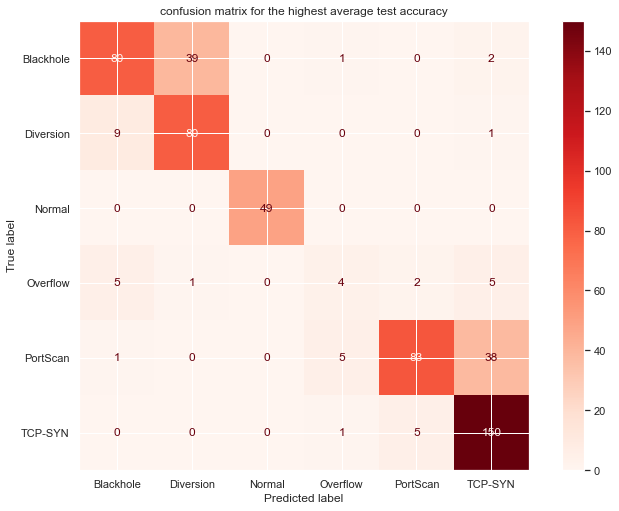

array([[ 80,  39,   0,   1,   0,   2],
       [  9,  80,   0,   0,   0,   1],
       [  0,   0,  49,   0,   0,   0],
       [  5,   1,   0,   4,   2,   5],
       [  1,   0,   0,   5,  83,  38],
       [  0,   0,   0,   1,   5, 150]], dtype=int64)

In [88]:
best_mod = MLP(newtrain,y_train,newvalidate,y_validate,num_epochs,Best_batch_size,verbose
                 ,best_optmizer,best_num_hidden,best_num_neurons,best_activ_fun)
predicted_b = best_mod.predict(newtest)
predicted_b = np.argmax(predicted_b , axis = 1)
predicted_b = predicted_b.reshape((-1,1))

con_matrix(y_test,predicted_b,'confusion matrix for the highest average test accuracy')

In [98]:
#evalute model preformance
final_score = best_mod.evaluate(newtest, y_test, verbose=verbose)
print('Loss: %.2f' % ( final_score[0]))
print('Accuracy: %.2f' % ( final_score[1]*100))

Loss: 0.56
Accuracy: 79.50
